In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

### Part 1: Covid Excess Mortality

In this section we will visualize trends in COVID-related mortality from 2020-2022.

A useful method for estimating Covid-related mortality at the national level is by examining "excess mortality". Excess mortality is the observed mortality in a year above the running 10-year average. Thus, absent of some other new pervasive source of mortality, we can infer covid-related mortality by attributing it to mortality above the "business-as-usual" background rates. As COVID mortality becomes a major part of this 10-year average, excess mortality becomes a less reliable metric so we will only focus on 2020-2022. 

In [2]:
# Read in covid excess mortality data
excess_mort = pd.read_csv("./data/national_excess_mortality.csv")
excess_mort.head()

,COUNTRY,Country,WEEK,GENDER,Gender,Age,VARIABLE,Variable,YEAR,Year,Value
0,CZE,Czech Republic,46,TOTAL,Total,0 to 44,EXCESSNB,Excess deaths (number),2020,2020,2.2
1,CZE,Czech Republic,46,TOTAL,Total,0 to 44,EXCESSNB,Excess deaths (number),2021,2021,8.2
2,NLD,Netherlands,3,TOTAL,Total,65 and over,EXCESSNB,Excess deaths (number),2020,2020,-127.4
3,NLD,Netherlands,3,TOTAL,Total,65 and over,EXCESSNB,Excess deaths (number),2021,2021,569.6
4,NLD,Netherlands,3,TOTAL,Total,65 and over,EXCESSNB,Excess deaths (number),2022,2022,-73.4


Set for only % change in excess deaths

In [3]:
unique_vars = excess_mort.Variable.unique()
excess_perc_change = excess_mort[excess_mort["Variable"] == "Excess deaths (% change from average)"]
excess_perc_change = excess_perc_change.drop(columns = ["COUNTRY", "YEAR", "GENDER", "VARIABLE"])
excess_perc_change = excess_perc_change.rename(columns = {"WEEK" : "Week"})
excess_perc_change.head()

,Country,Week,Gender,Age,Variable,Year,Value
38466,Denmark,29,Males,45 to 64,Excess deaths (% change from average),2020,1.0
38467,Denmark,29,Males,45 to 64,Excess deaths (% change from average),2021,4.7
38468,Estonia,47,Males,45 to 64,Excess deaths (% change from average),2020,32.4
38469,Estonia,47,Males,45 to 64,Excess deaths (% change from average),2021,35.3
38473,Luxembourg,40,Males,Total,Excess deaths (% change from average),2020,-4.0


The temporal granularity

In [4]:
excess_grouped_week = excess_perc_change.sort_values(by=['Week'])
excess_grouped_week = excess_grouped_week.groupby("Week")

Because the data provided is on weekly basis, we can say that the temporal granularity of our data is weekly.

Create a new column in the dataframe representing time as a continous quantity by whatever method you see fit, then subset your data for TOTAL gender and Total age. 

In [5]:
excess_perc_change['Cont. Time'] = pd.to_datetime(excess_perc_change['Year'].astype(str), format='%Y') + \
                         pd.to_timedelta(excess_perc_change['Week'] * 7, unit='d')

subset_excess = excess_perc_change[excess_perc_change['Gender'] == 'Total']
subset_excess = subset_excess[subset_excess['Age'] == 'Total']
subset_excess.head()

,Country,Week,Gender,Age,Variable,Year,Value,Cont. Time
38475,Belgium,18,Total,Total,Excess deaths (% change from average),2020,20.7,2020-05-06
38476,Belgium,18,Total,Total,Excess deaths (% change from average),2021,12.5,2021-05-07
38477,Belgium,18,Total,Total,Excess deaths (% change from average),2022,11.5,2022-05-07
38497,Denmark,37,Total,Total,Excess deaths (% change from average),2020,3.6,2020-09-16
38498,Denmark,37,Total,Total,Excess deaths (% change from average),2021,10.6,2021-09-17


Create two subplots: (1) excess mortality in the US and Canada through the entire time series and (2) the same but for France and the United Kingdom. 

/var/folders/vb/8z265h0d0gn94dqwgkglhhcr0000gn/T/ipykernel_26455/1911544987.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(usa["Cont. Time"], rotation=90)
/var/folders/vb/8z265h0d0gn94dqwgkglhhcr0000gn/T/ipykernel_26455/1911544987.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(uk["Cont. Time"], rotation=90)


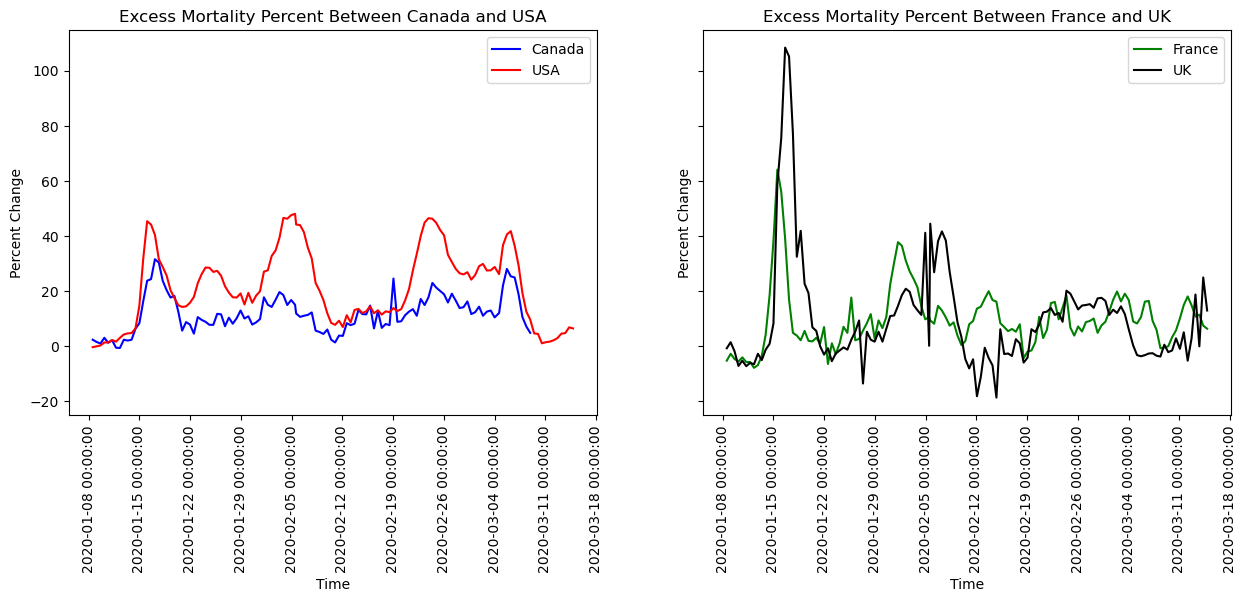

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5), sharey = True)

can = subset_excess[subset_excess["Country"] == "Canada"].sort_values(by=["Cont. Time"])
usa = subset_excess[subset_excess["Country"] == "United States"].sort_values(by=["Cont. Time"])
ax1.plot(can["Cont. Time"], can["Value"], color = "blue", label = "Canada")
ax1.plot(usa["Cont. Time"], usa["Value"], color = "red", label = "USA")
ax1.set_xticklabels(usa["Cont. Time"], rotation=90)
ax1.legend()
ax1.set(xlabel = "Time", ylabel = "Percent Change", title = "Excess Mortality Percent Between Canada and USA")

fra = subset_excess[subset_excess["Country"] == "France"].sort_values(by=["Cont. Time"])
uk = subset_excess[subset_excess["Country"] == "United Kingdom"].sort_values(by=["Cont. Time"])
ax2.plot(fra["Cont. Time"], fra["Value"], color = "green", label = "France")
ax2.plot(uk["Cont. Time"], uk["Value"], color = "black", label = "UK")
ax2.set_xticklabels(uk["Cont. Time"], rotation=90)
ax2.legend()
ax2.set(xlabel = "Time", ylabel = "Percent Change", title = "Excess Mortality Percent Between France and UK")

plt.show()

**Inference**: When comparing these two subplots for excess mortality rate, we can see that both sets of nearby countries have very similar rate in change. What I mean by this is that the USA and Canada have very similar rates of change over the years, while the UK and France also have very similar change in rates. Another thing I notice is that the rates for USA and Canada seem to be a little more consistent with 4 medium spikes over all the years. This is different from the UK and France where they both have 1 very large spike in excess mortality early on in the pandemic. Finally, I notice that only the UK had a noticeable decrease in mortality rate at any point over these years.

Change in mortality rate by age group in USA

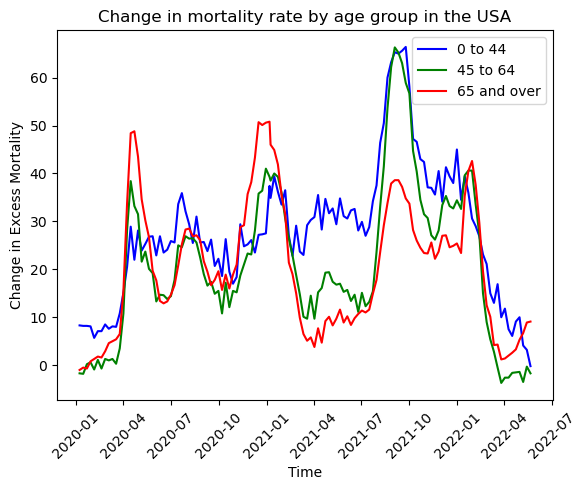

In [7]:
usa = excess_perc_change[excess_perc_change["Country"] == "United States"]
z_f = usa[usa["Age"] == "0 to 44"].sort_values(by=["Cont. Time"])
f_s = usa[usa["Age"] == "45 to 64"].sort_values(by=["Cont. Time"])
s_o = usa[usa["Age"] == "65 and over"].sort_values(by=["Cont. Time"])

plt.plot(z_f["Cont. Time"], z_f["Value"], color = "blue", label = "0 to 44")
plt.plot(f_s["Cont. Time"], f_s["Value"], color = "green", label = "45 to 64")
plt.plot(s_o["Cont. Time"], s_o["Value"], color = "red", label = "65 and over")
plt.legend()
plt.xticks(rotation = 45)
plt.xlabel("Time")
plt.ylabel("Change in Excess Mortality")
plt.title("Change in mortality rate by age group in the USA")
plt.show()

**Inference**: From this graph we can see that in general the rate of excess mortality across age groups in the United States hold a roughly similar path, however, we can see that the first two major spikes show significant increases to the deaths of people aged 65 and over, while the most recent spike was much larger for the other two age groups while the age group of 65 and older had a much lower spike at nearly half the rate. To continue this exploration I would probably continue this comparing but by adding subplots for other countries as well, to see how the age groups in other countries death rates compared. 

## Part 2: Global Life Expectancy

The last century has seen massive improvements in global life expectancy with the development of certain medical technologies (antibiotics, vaccines, etc...) and with greater abundance of food and thus enhanced nutrition. However, these improvements to health and lifespan are not equally distributed, partly due to the unequal distribution of food and healthcare. 

First, read in the 'WHO_life_expectancy' data. All the data in this section are from **Our World in Data**, who have aggregated enormous amounts of data about the world. You can access this data for your own use [here](https://ourworldindata.org/charts). 

In [8]:
who = pd.read_csv("./data/WHO_life_expectancy.csv")
who.head()

,GHO_code,GHO_display,YEAR,REGION_code,REGION_display,COUNTRY_code,COUNTRY_display,SEX_code,SEX_display,Value
0,WHOSIS_000001,Life expectancy at birth (years),2015,AFR,Africa,AGO,Angola,BTSX,Both sexes,61.7
1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2019,AFR,Africa,AGO,Angola,BTSX,Both sexes,54.8
2,WHOSIS_000007,Healthy life expectancy (HALE) at age 60 (years),2019,AFR,Africa,AGO,Angola,BTSX,Both sexes,12.6
3,WHOSIS_000015,Life expectancy at age 60 (years),2010,AFR,Africa,AGO,Angola,BTSX,Both sexes,16.0
4,WHOSIS_000001,Life expectancy at birth (years),2010,AFR,Africa,AGO,Angola,BTSX,Both sexes,58.1


Visualize life expectancy in different parts of the world and how that has changed in recent history (2000 vs 2019).

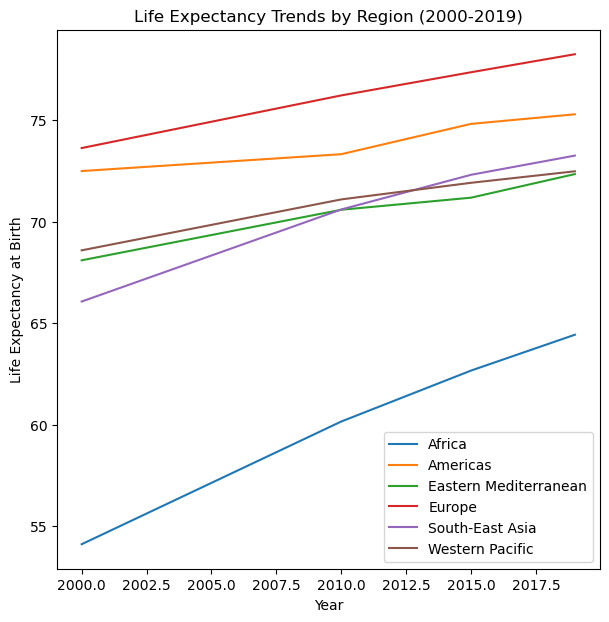

In [9]:
plt.figure(figsize=(7, 7))

who_baby = who[(who["GHO_display"] == "Life expectancy at birth (years)") & (who["SEX_display"] == "Both sexes")]
who_baby_clean = who_baby.drop(columns = ["REGION_code", "COUNTRY_code", "SEX_code", "GHO_code"])
grouped_data = who_baby_clean.groupby(['REGION_display', 'YEAR'])['Value'].mean().reset_index()

sns.lineplot(x = 'YEAR', y = 'Value', hue = 'REGION_display', data = grouped_data)
plt.title('Life Expectancy Trends by Region (2000-2019)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth')
plt.legend()
plt.show()

**Inference:** From the graph above we can see that Africa was the region with the greatest increase in life expectancy since the year 2000 and in overall Europe is the region with the highest life expectancy as of 2019.

Now read in the "poverty_vs_life-expectancy" data. These data contains the life expectancy over time for many countries, as well as the percentage of the population living below the global standard for poverty (~$3/day).

In [10]:
pvl = pd.read_csv("./data/poverty-vs-life-expectancy.csv")
pvl.head()

,Entity,Year,Life_expectancy,population_%_below_poverty,Population
0,Abkhazia,2015,NaN,NaN,NaN
1,Afghanistan,1950,27.7,NaN,7480464.0
2,Afghanistan,1951,28.0,NaN,7571542.0
3,Afghanistan,1952,28.4,NaN,7667534.0
4,Afghanistan,1953,28.9,NaN,7764549.0


Creating a scatter plot with the following features:

1. Life expectancy (y) as a function of population % below poverty (x)
2. Increasing point size with country population. You should scale the point sizes down such that no points touch the axes.
3. Some degree of transparency to the points
4. Different colored points for each region of the country.
5. Two labels and arrows identifying which point represents the U.S., and which point represents the country with the lowest life expectancy (the label should be its name). The labels should be offset from the points to improve readability. 

Format `pvl` such that each row is the **most recent year** of data for each country where there is **both** an observed value for life expectancy **and** an observed value for population % below poverty. Subset the resulting data for countries with data equal to or after 2015.

In [11]:
pvl_no_na = pvl.dropna()
pvl_sub = pvl_no_na[pvl_no_na['population_%_below_poverty'] != 0]
pvl_subset = pvl_no_na.sort_values('Year', ascending=False).drop_duplicates('Entity', keep='first')
pvl_clean = pvl_subset[pvl_subset["Year"] >= 2015]
print(len(pvl_clean))

122


To add the regions to our poverty data, we will need to merge the `who` data (again subset only for life expectancy) with the clean pvl data.

In [12]:
typos = {'Iran (Islamic Republic of)' : "Iran", 'Bolivia (Plurinational State of)' : "Bolivia",
        "Côte d'Ivoire" : "Cote d'Ivoire", 'Russian Federation' : "Russia",
        'Viet Nam' : "Vietnam", "United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",
        "Lao People's Democratic Republic" : "Laos", "Cabo Verde" : "Cape Verde",
        'United States of America' : 'United States', "Türkiye" : 'Turkey',
        'Republic of Korea' : 'South Korea', 'Republic of Moldova' : "Moldova"}
who_baby_clean['COUNTRY_display'].replace(typos, inplace = True)

In [13]:
who_baby_clean = who_baby_clean[who_baby_clean["YEAR"] >= 2015]
who_baby_clean = who_baby_clean.sort_values('YEAR', ascending=False).drop_duplicates('COUNTRY_display', keep='first')
merged_data = pd.merge(who_baby_clean, pvl_clean, left_on='COUNTRY_display', right_on='Entity', how='inner')
merged_data.tail()

,GHO_display,YEAR,REGION_display,COUNTRY_display,SEX_display,Value,Entity,Year,Life_expectancy,population_%_below_poverty,Population
117,Life expectancy at birth (years),2019,Europe,Czechia,Both sexes,79.1,Czechia,2019,79.2,0.000000,10536876.0
118,Life expectancy at birth (years),2019,Africa,Sao Tome and Principe,Both sexes,70.4,Sao Tome and Principe,2017,68.3,44.843155,208050.0
119,Life expectancy at birth (years),2019,Americas,Colombia,Both sexes,79.3,Colombia,2020,74.8,21.063238,50930656.0
120,Life expectancy at birth (years),2019,Americas,Costa Rica,Both sexes,80.8,Costa Rica,2020,79.3,5.950640,5123107.0
121,Life expectancy at birth (years),2019,Western Pacific,Tonga,Both sexes,72.6,Tonga,2015,70.6,8.782233,106140.0


Create the scatterplot as previously described

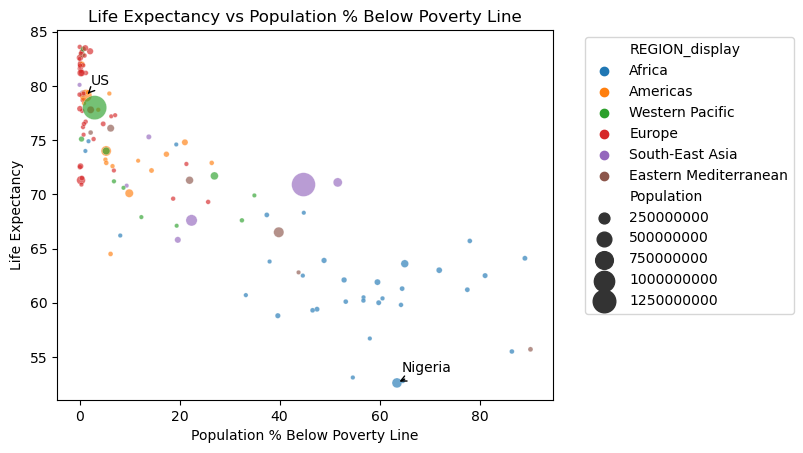

In [14]:
sns.scatterplot(data = merged_data, x = "population_%_below_poverty", y = "Life_expectancy", 
               hue = "REGION_display", size = "Population", sizes = (10, 300), alpha = 0.65)

us_stuff= merged_data[merged_data['Entity'] == 'United States']
low_country = merged_data.loc[merged_data['Life_expectancy'].idxmin()]

plt.annotate("US",(us_stuff['population_%_below_poverty'], 
            us_stuff['Life_expectancy']), xytext=(us_stuff['population_%_below_poverty'] + 1, 
            us_stuff['Life_expectancy'] + 1), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(low_country['Entity'],(low_country['population_%_below_poverty'], 
            low_country['Life_expectancy']), xytext=(low_country['population_%_below_poverty'] + 1, 
            low_country['Life_expectancy'] + 1), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('Population % Below Poverty Line')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Population % Below Poverty Line')
plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()

**Inference:** Fristly from this plot we can learn that Nigeria is the country that has the lowest life expentancy for countries with data since 2015. Secondly, we can see that on average the graph follows a negative slope meaning that as the population % below poverty line increase the life expectancy will decrease. And thirdly, we can see that the countries with the lowest life expectancy as well as highest population % below poverty line are mostly from Africa.

### Part 3: 2018-2019 Oregon Women's Basketball

The file `uo_women_basketball_18-19.csv` provides the raw statistics for the team's games during the 2018-19 season.

In [15]:
bbgames = pd.read_csv("./data/uo_women_basketball_18-19.csv")
bbgames.head(5)

,Opponent,Location,Date,OrQ1,OrQ2,OrQ3,OrQ4,OpQ1,OpQ2,OpQ3,OpQ4,OrOT1,OpOT1
0,Alaska Fairbanks,AWAY,11/06/18,34,26,29,26,9,13,8,6,0,0
1,Syracuse,HOME,11/10/18,20,14,14,27,10,17,17,29,0,0
2,Utah State,AWAY,11/14/18,30,19,20,19,15,13,15,14,0,0
3,Buffalo,HOME,11/18/18,26,23,31,22,16,23,21,22,0,0
4,UC Riverside,HOME,11/23/18,23,29,25,17,11,7,13,13,0,0


Adding three columns to `bbgames`:
* OrTotal - Oregon's total points for the game
* OpTotal - the Opponent's total points for the game
* Result - 1 if Oregon won the game, 0 if Oregon lost the game

In [16]:
bbgames['OrTotal'] = bbgames["OrQ1"] + bbgames["OrQ2"] + bbgames["OrQ3"] + bbgames["OrQ4"] + bbgames["OrOT1"]
bbgames['OpTotal'] = bbgames["OpQ1"] + bbgames["OpQ2"] + bbgames["OpQ3"] + bbgames["OpQ4"] + bbgames["OpOT1"]
results = []
for i in range(len(bbgames)):
    if bbgames['OrTotal'][i] > bbgames['OpTotal'][i]:
        results.append(1)
    else:
        results.append(0)
bbgames['Result'] = results
bbgames.head()

,Opponent,Location,Date,OrQ1,OrQ2,OrQ3,OrQ4,OpQ1,OpQ2,OpQ3,OpQ4,OrOT1,OpOT1,OrTotal,OpTotal,Result
0,Alaska Fairbanks,AWAY,11/06/18,34,26,29,26,9,13,8,6,0,0,115,36,1
1,Syracuse,HOME,11/10/18,20,14,14,27,10,17,17,29,0,0,75,73,1
2,Utah State,AWAY,11/14/18,30,19,20,19,15,13,15,14,0,0,88,57,1
3,Buffalo,HOME,11/18/18,26,23,31,22,16,23,21,22,0,0,102,82,1
4,UC Riverside,HOME,11/23/18,23,29,25,17,11,7,13,13,0,0,94,44,1


Adding 4 columns to `bbgames`:
* Q1fraction - the fractional scoring differential for Q1
* Q2fraction - the fractional scoring differential for Q2
* Q3fraction - the fractional scoring differential for Q3
* Q4fraction - the fractional scoring differential for Q4

In [17]:
Q1_frac = (bbgames["OrQ1"] - bbgames['OpQ1']) / (bbgames["OrQ1"] + bbgames['OpQ1'])
Q2_frac = (bbgames["OrQ2"] - bbgames['OpQ2']) / (bbgames["OrQ2"] + bbgames['OpQ2'])
Q3_frac = (bbgames["OrQ3"] - bbgames['OpQ3']) / (bbgames["OrQ3"] + bbgames['OpQ3'])
Q4_frac = (bbgames["OrQ4"] - bbgames['OpQ4']) / (bbgames["OrQ4"] + bbgames['OpQ4'])

Creating a scatter plot showing the result on the y-axis and Q1fraction on the x-axis.

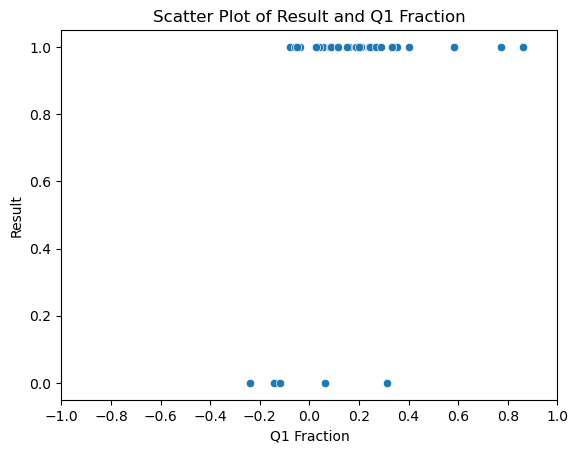

In [18]:
sns.scatterplot(data = bbgames, x = Q1_frac, y = "Result")
plt.xticks(np.arange(-1, 1.2, .2))
plt.xlabel("Q1 Fraction")
plt.title("Scatter Plot of Result and Q1 Fraction")
plt.show()

Defining a function `sig(x)` below that returns the value of the sigmoid function for the value `x`. Then plot `sig(25*x)` over the range of \[-1, 1\].

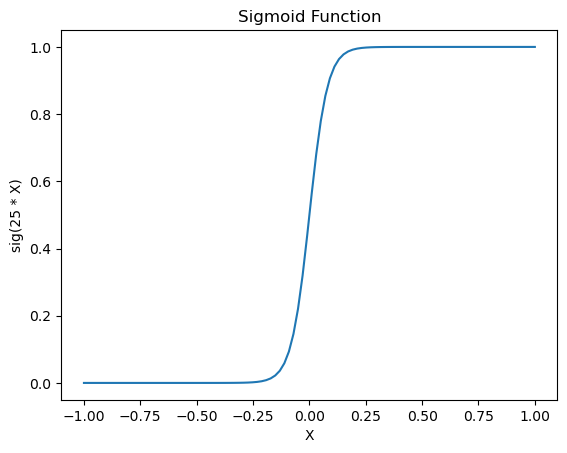

In [19]:
def sig(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-1, 1, 100)
y_values = sig(25 * x_values)

plt.plot(x_values, y_values)
plt.xlabel('X')
plt.ylabel('sig(25 * X)')
plt.title('Sigmoid Function')
plt.show()

Now fitting four single-feature logistic regression models *e.g.* $P(Y=1|x)~=~\sigma(\theta_0 + \theta_1~\cdot~Q1fraction)$ for the fractional scoring difference in each of the four quarters. Then calculating the loss of the model using a cross-entropy loss function.

In [20]:
bbgames["Q1_frac"] = Q1_frac
bbgames["Q2_frac"] = Q2_frac
bbgames["Q3_frac"] = Q3_frac
bbgames["Q4_frac"] = Q4_frac

quarters = ["Q1_frac", "Q2_frac", "Q3_frac", "Q4_frac"]
losses = []

for i in quarters:
    X = bbgames[i].values.reshape(-1, 1)
    y = bbgames['Result'].values

    model = LogisticRegression(C=10000)
    model.fit(X, y)

    y_pred_proba = model.predict_proba(X)[:, 1] 

    loss = log_loss(y, y_pred_proba)
    losses.append(loss)

    print(f'Quarter: {i}, Cross-Entropy Loss: {loss}')

print(f'Average Loss: {sum(losses) / len(losses)}')

Quarter: Q1_frac, Cross-Entropy Loss: 0.29211802769275325
Quarter: Q2_frac, Cross-Entropy Loss: 0.34621106294345744
Quarter: Q3_frac, Cross-Entropy Loss: 0.3523868605856207
Quarter: Q4_frac, Cross-Entropy Loss: 0.2151816774084152
Average Loss: 0.30147440715756163


Now ploting the result vs score fractional difference for the quarter associated with your best-fit model.

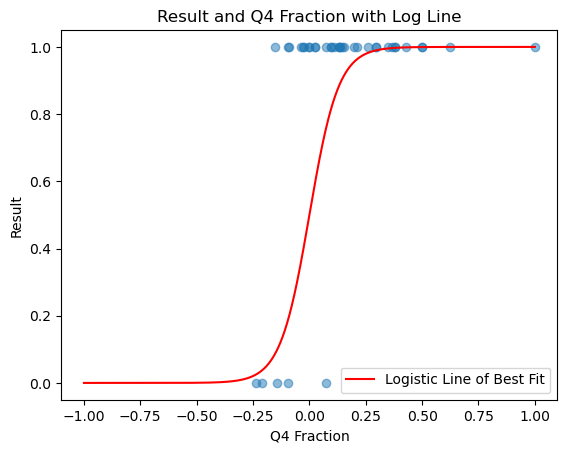

In [21]:
X = bbgames['Q4_frac'].values.reshape(-1, 1)
y = bbgames['Result'].values

model = LogisticRegression(C=10000)
model.fit(X, y)

theta1 = model.coef_[0][0] 

x_values = np.linspace(-1, 1, 1000)
y_values = sig(theta1 * x_values)

plt.scatter(bbgames['Q4_frac'], bbgames['Result'], alpha=0.5)
plt.plot(x_values, y_values, color='red', label='Logistic Line of Best Fit')
plt.xlabel('Q4 Fraction')
plt.ylabel('Result')
plt.legend()
plt.title('Result and Q4 Fraction with Log Line')
plt.show()

Linearizing the logistic relationship between fraction and Result in the graph above and replot the relationship.

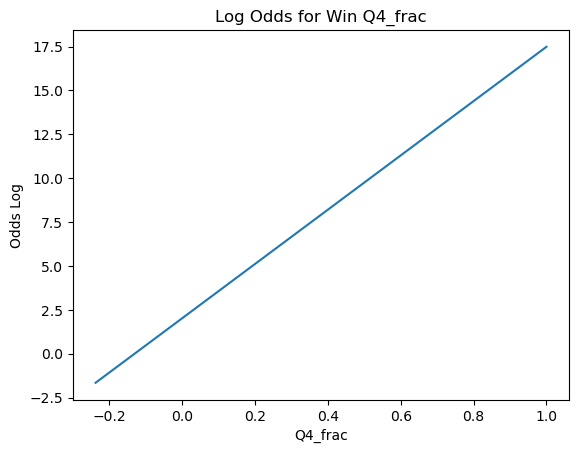

In [22]:
def link_func(p):
    return np.log(p / (1 - p))

info = np.array(bbgames['Q4_frac']).reshape(-1, 1)
ps = model.predict_proba(info)[:, 1]

sns.lineplot(x = bbgames['Q4_frac'], y = link_func(ps))
plt.ylabel("Odds Log")
plt.title('Log Odds for Win Q4_frac')
plt.xlabel("Q4_frac")
plt.show()

Computing the accuracy, precision, and recall of your best model.

In [23]:
results = (ps > .5).astype(int)
true = results == bbgames["Result"]

TN = results[true].shape[0] - results[true].sum()
FN = results[~true].shape[0] - results[~true].sum()
FP = results[~true].sum()
TP = results[true].sum()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
(TN, FN, FP, TP, accuracy, precision, recall)

(3, 1, 2, 32, 0.9210526315789473, 0.9411764705882353, 0.9696969696969697)

**Inference**: It seems that the fourth quarter is the best quarter for predictng a win while the third quarter was the worst. I believe this is because basketball is a very high scoring game and teams can very quickly catch up or fall behind meaning that many games outcome truly come down to the final few minutes of every game (ie the fourth quarter). I think the third quarter is the worst because of the fact that after a break at halftime the momentum of a game can change very quickly and teams that were once doing bad are able to gather themselves and try again.

### Section 4

For the final part, we will fit a multiple logistic regression model to predict whether a tissue sample from a biopsied breast mass is maligant or benign using a number of measured characteristics of the sample.

Read in `breast_cancer.csv`. Data from https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

    diagnosis: M = malignant, B = benign
    radius: distances from center to points on the perimeter
    texture: standard deviation of gray-scale values
    smoothness: local variation in radius lengths
    compactness: perimeter^2 / area - 1.0
    symmetry
    fractal dimension: "coastline approximation" - 1


In [24]:
bc = pd.read_csv("./data/breast_cancer.csv")
bc.head()

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115


In [25]:
y = bc["diagnosis"].replace({"M":1,"B":0})
X = bc.drop(["id","diagnosis"], axis = 1)

The plan is to determine which of the anatomical characteristics of the tissue sample are the most important for predicting malignancy. (1) Standardize the features (X) and (2) split the data into train and test sets.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state = 42)

Now comparing train and test fits at different strengths of regularization penalties (provided)

In [28]:
regs = [.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
coefs = []
res = pd.DataFrame(index = regs, columns = ['Train_error', 'Test_error'])

for r in regs:
    model = LogisticRegression(C=r, random_state = 42)
    model.fit(X_train, y_train)
    coefs = np.append(coefs, model.coef_[0])
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_error = log_loss(y_train, train_predictions)
    test_error = log_loss(y_test, test_predictions)
    
    res.loc[r, 'Train_error'] = train_error
    res.loc[r, 'Test_error'] = test_error
    
coefs = coefs.reshape(len(regs), -1)
coefs = pd.DataFrame(coefs, columns = X.columns)

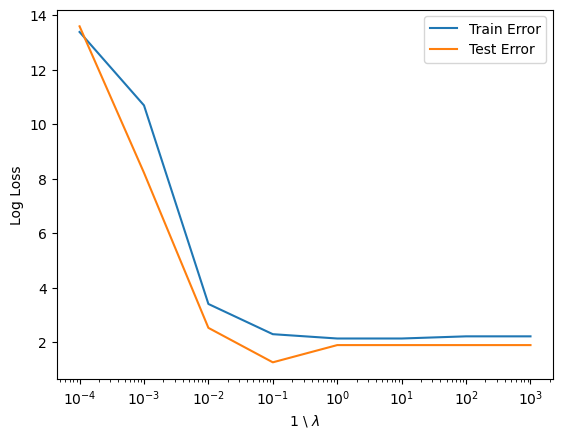

In [29]:
sns.lineplot(x = regs, y = res["Train_error"], label = "Train Error")
sns.lineplot(x = regs, y = res["Test_error"], label = "Test Error")
plt.xscale('log')
plt.ylabel("Log Loss")
plt.xlabel("1 \ $\lambda$");

**Inference:** As we can see from the graph with lower regs for C, we have a high level of log loss for both the test and train set. This loss then decreases as we increase the regs for C until we hit a point where the test set is most accurate at 10^-1 before increasing again, while the train set follows a pretty steady downward slope until it flatten out at 10^-1. From this we can infer that regluarization on parameters can help avoid an overfit model and finding the right level of model complexity, thus improving the model. 

Creating a lineplot showing the change in the estimated parameters for each variable across the range of regularization strength

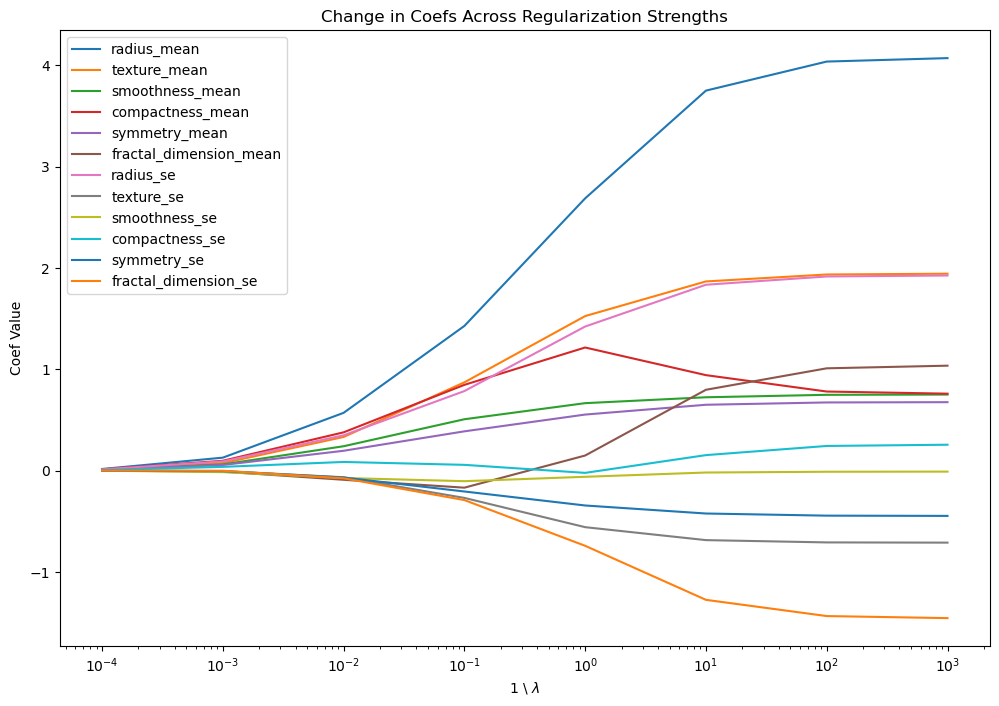

In [30]:
plt.figure(figsize = (12, 8))
for col in coefs.columns:
    sns.lineplot(x = regs, y = coefs[col], label = col)
plt.xscale('log')
plt.ylabel("Coef Value")
plt.xlabel("1 \ $\lambda$")
plt.title("Change in Coefs Across Regularization Strengths")
plt.show()

**Inference:** From the graph above we can see that the 2 parameters the change the least across the regularization strengths while remaining positive are symmetry mean and smoothness mean showing that they are the most predictive for this model. This means we can then infer that these variables are the most important for predicting malignancy. However we can also suggest that compactness mean is also important for predicting malignancy as it returns back to the other two predictors as regularization increases.